In [2]:
import bagpy
from bagpy import bagreader

In [3]:
stationary_individual = bagreader('src/Data/stationary_laleth.bag')


[INFO]  Successfully created the data folder /home/laleth/Robotic Sensing and Navigation/Lab0/LAB0_ws/src/Data/stationary_laleth.


In [4]:
stationary_individual.topic_table

,Topics,Types,Message Count,Frequency
0,/imu,imu_driver/Vectornav,12075,23.417998


In [5]:
imu_ind = stationary_individual.message_by_topic('/imu')


In [7]:
import pandas as pd
df= pd.read_csv('src/Data/stationary_laleth/imu.csv')


In [26]:
df.tail()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,imu.header.seq,imu.header.stamp.secs,imu.header.stamp.nsecs,imu.header.frame_id,imu.orientation.x,...,imu.linear_acceleration_covariance,mag_field.header.seq,mag_field.header.stamp.secs,mag_field.header.stamp.nsecs,mag_field.header.frame_id,mag_field.magnetic_field.x,mag_field.magnetic_field.y,mag_field.magnetic_field.z,mag_field.magnetic_field_covariance,imu_raw_data
12070,1.677953e+09,32562,1677953109,783268690,imu1_frame,0,0,0,NaN,-0.076094,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0040,-0.3186,0.3290,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.593,-002.269,-014.420,+00.0040,-00..."
12071,1.677953e+09,32563,1677953109,808231592,imu1_frame,0,0,0,NaN,-0.076081,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0112,-0.3175,0.3360,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.593,-002.269,-014.418,+00.0112,-00..."
12072,1.677953e+09,32564,1677953109,833246946,imu1_frame,0,0,0,NaN,-0.076073,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0040,-0.3162,0.3223,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.595,-002.270,-014.418,+00.0040,-00..."
12073,1.677953e+09,32565,1677953109,858099699,imu1_frame,0,0,0,NaN,-0.076086,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0053,-0.3086,0.3262,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.595,-002.269,-014.419,+00.0053,-00..."
12074,1.677953e+09,32566,1677953109,883114576,imu1_frame,0,0,0,NaN,-0.076086,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0064,-0.3149,0.3304,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.595,-002.269,-014.419,+00.0064,-00..."


## Time series of gyro

In [27]:
import plotly.express as px
import numpy as np
# Scatterplots of the Northing vs. Easting data
fig = px.scatter_3d(df, x="imu.linear_acceleration.x", y="imu.linear_acceleration.y", z = "imu.linear_acceleration.z")
fig.update_traces(marker_size = 2)
fig.show()

## Time series of accel

In [16]:
# Comparision between gps and google map position
fig = px.scatter_3d(df, x="imu.angular_velocity.x", y="imu.angular_velocity.y", z = "imu.angular_velocity.z")
fig.update_traces(marker_size = 2)
fig.show()

## Time series of orientation

In [32]:
import math 

gyro_x = []
gyro_y = []
gyro_z = []

for i in range(len(df)):
    x = df["imu.orientation.x"][i]
    y = df["imu.orientation.y"][i]
    z = df["imu.orientation.z"][i]
    w = df["imu.orientation.w"][i]

    R = np.array([[1-2*(y**2+z**2), 2*(x*y-z*w), 2*(x*z+y*w)],
                  [2*(x*y+z*w), 1-2*(x**2+z**2), 2*(y*z-x*w)],
                  [2*(x*z-y*w), 2*(y*z+x*w), 1-2*(x**2+y**2)]])
    
    roll = math.atan2(R[2,1], R[2,2])
    pitch = -math.asin(R[2,0])
    yaw = math.atan2(R[1,0], R[0,0])
    gyro_x.append(roll)
    gyro_y.append(pitch)
    gyro_z.append(yaw)

df["gyro_x"] = gyro_x
df["gyro_y"] = gyro_y
df["gyro_z"] = gyro_z

In [33]:
# Comparision between gps and google map position
fig = px.scatter_3d(x=gyro_x, y=gyro_y, z = gyro_z)
fig.update_traces(marker_size = 2)
fig.show()

In [34]:
print("mean x = ",df["gyro_x"].mean())
print("mean y = ",df["gyro_y"].mean())
print("mean z = ",df["gyro_z"].mean())

print("median x = ",df["gyro_x"].median())
print("median y = ",df["gyro_y"].median())
print("median z = ",df["gyro_z"].median())

mean x =  -0.25144407688780074
mean y =  -0.040068432076489205
mean z =  1.54733330990125
median x =  -0.251449585334823
median y =  -0.0401076662108297
median z =  1.547269288478013


## Distribution of accel x

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fba816ac0>]],
      dtype=object)

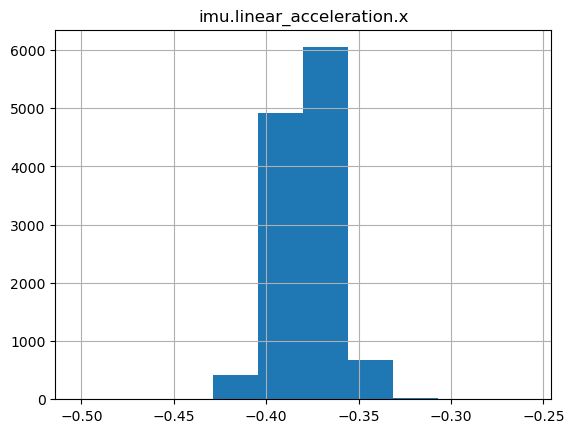

In [35]:
df.hist(column='imu.linear_acceleration.x')